In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style()
from matplotlib.image import imread

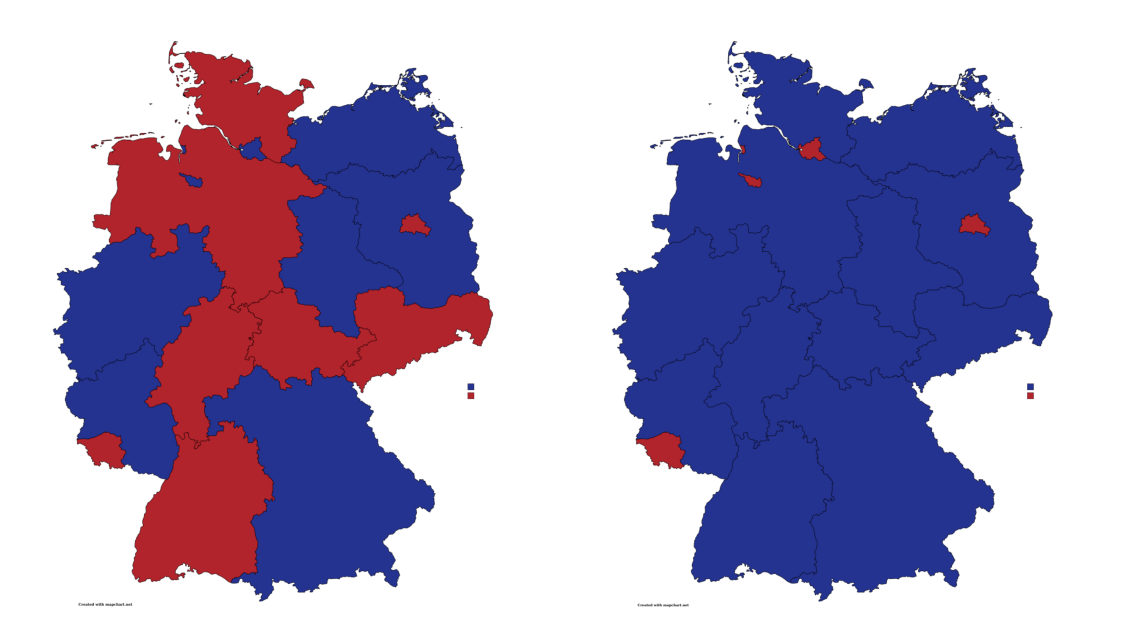

In [2]:
plt.figure(figsize=(20, 40))
plt.imshow(imread('data/06/maps.png'))
plt.axis('off')
plt.show()

## Обсудим ситуацию в ~~Германии~~ Вообразилии

Сначала подумаем, что же это за такие забавные маленькие области на карте. Вероятнее всего, это районы страны, в которых очень большая плотность населения, поэтому они выделены в отдельные округа. Назовём их, по порядку, сверху вниз:
- Вооброгамбург;
- Вообробремерхафен;
- Вообробремен;
- Вооброберлин;
- Вообросаар.

Пока что отдельно посчитаем большие и малые области по цветам:

### До почтового голосования
#### Большие
- Красные: 6
- Синие: 6
#### Маленькие
- Красные: 2
- Синие: 3

### После почтового голосования
#### Большие
- Красные: 0
- Синие: 12

#### Маленькие
- Красные: 5
- Синие: 0

Выглядит это довольно странно, давайте попробуем разобраться.

**U.S.**: понимание повестки партий тоже могло бы навести на какие-то мысли (вдруг, например, одна из партий призывала сторонников *не* голосовать по почте?).

# Гипотезы

- В городских агломерациях больше голосуют за красных, в сельской месности — за синих, почтовое голосование просто привело всё в правильное состояние;
- Голосование по почте в сельской местности контролировалось синей партией, что флипнуло результаты;
- По почте голосуют разные категории людей в зависимости от город/не город, что приводит к резкому флипу результатов.

## Гипотеза №1

### Нулевая гипотеза
В городских агломерациях больше поддерживают красных, в сельской месности — синих, почтовое голосование просто привело всё в правильное состояние.

### Альтернативная гипотеза
Либо в городских агломерациях не поддерживют больше красных, либо в сельской местности не поддерживют больше синих, либо и то, и другое, при этом голосование было каким-либо образом искажено.

### Дополнительные данные
Хотелось бы получить:

1) Исторические данные о распределении голосов (последние несколько лет)
2) Текущее распределение голосов

### Тесты

Можно провести произвольные тесты, исследующие сходство исторических и текущей выборок (при этом мы не будем разделять голоса по почте и очные, а сложим всё в одну кучу, так как предполагается, что на прошлых выборов возможности голосовать по почте не было), например, хи-квадрат тест.

### Интерпретация

Если тест покажет, что выборки не схожи, то, на самом деле, это ещё не будет вести к необходимости отвергать нулевую гипотезу, так как на голосование могло дейстоввать множество факторов:
- Политические предпочтения некоторых групп населения могли измениться по множеству причин;
- У одной из партий есть основания полагать, что другая будет пытаться фальсифицировать выборы, и поэтому призывает своих сторонников бойкотировать выборы;
- Многие люди могут голосовать не за партии, а за конкретных их представителей, что тоже смещает выборку.

В конце концов, люди не обязаны голосовать за одни и те же партии из года в год.

Для того, чтобы отвергнуть или не отвергнуть эту теорию понадобится гораздо больше данных, в том числе не численных.

## Гипотеза №1.5

### Нулевая гипотеза
Люди в основном голосуют не за партии, а за конкретных их представителей.

### Альтернативная гипотеза
Люди могут голосовать как за партии, так и за конкретных людей.

### Дополнительные данные
1) Текущие распределения голосов
2) Рейтинги популярности конкретных политиков, например, [как здесь](https://wciom.ru/ratings/doverie-politikam).

### Тесты
Нам ещё успеет надоесть хи-квадрат. Но здесь он тоже пригодится - мы хотим сравнить распределение голосов по партиям и уровни доверия соответствующим представителям.

### Интерпретация
Если распределения не совпадают, то можно делать вывод о том, что нулевая гипотеза верна, и люди голосуют за конкретных политиков. В обратном случае, однозначных выводов сделать нельзя и придется принять альтернативную гипотезу, которая не особенно содержательна.


## Гипотеза №2

### Нулевая гипотеза
Голосование по почте в сельской местности существенно смещено в сторону синей партии.

### Альтернативная гипотеза
Голосование по почте либо несущественно смещено в сторону синей партии, либо не смещено в неё вообще.

### Дополнительные данные
Очень сложно. Для проверки подобной гипотезы, вероятнее всего, нам нужны дополнительные данные:

1) Аналог exit-poll для почтового голосования (черт знает как реализовать это не нарушая тайну голосования, но, например, можно помечать свой бланк типа "согласен на публикацию моего голоса с сохранением анонимности")
2) Опрос среди населения, голосовавшего по почте (ыыы примерно 100% людей, принявших участие в соцопросе, сказали, что готовы принимать участие в соцопросе)
3) Распределение голосов, полученных по почте

### Тесты
Хи-квадрат опять спешит на помощь - теперь нам нужно будет оценить схожесть выборок наборов данных по пунктам (1) и (2) с реальными данными, которые мы наблюдаем.

### Интерпретация

Опять довольно сложно утверждать, что несхожесть вышеописанных выборок ведёт к гарантированному отвержению нулевой гипотезы. Например, может оказаться, что представители синей партии существенно больше беспокоятся о своей приватности, вследствии чего доля опрошенных "синих" избирателей будет меньше доли опрощенных "красных", что приведёт нас к ложным выводам.

## Гипотеза №3

### Нулевая гипотеза
По почте голосуют разные категории людей в зависимости от город/не город, что приводит к резкому флипу результатов.

### Альтернативная гипотеза
Одинаковые категории людей голосуют одинаково вне зависимости от проживания в городе или не в сельской местности.

### Дополнительные данные
1) Опять, большие опросники, которые будут включать всякие отвлечённые вопросы и политические предпочтения.
2) Текущие распределения.

### Тесты
Тут можно использовать россыпь тестов, особенно если мы будем получать довольно маленькие выборки, однако, как обычно, наш герой - хи-квадрат. Можно сравнивать политические предпочтения одинаковых групп людей (например, по семейному положению и доходу) в городе и деревне, соответственно.

### Интерпретация
Похожесть политических предпочтений различных групп людей приведёт к отвержению нулевой гипотезы, однако из этого исследования можно будет извлечь более интересные и точечные результаты, например, изучая конкретные группы людей и фокусирую своё внимание на них.

## P.S.:

Есть ещё множество интерсных гипотез, которые можно было бы проверить гораздо более пристально, если бы мы знали, что это на самом деле за страна. Например, исторические предпочтения восточной Вообразилии и западной Вообразилии, или что-нибудь, что может дать инсайты на отношение людей к политическим партиям.

## P.P.S.:

На самом деле было бы правда очень круто порешать в качестве домашнего задания подобную задачу, но с имеющимися данными (например, для одного конкретного города). Но это уже больше, видимо, про анализ данных. Хотя что такое матстат если не анализ данных...